# Initialize Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import ROOT
import uproot
import os
import sys
import tqdm
import pandas as pd
import pickle as pkl

%jsroot on
# %matplotlib qt
%matplotlib inline

Welcome to JupyROOT 6.30/02


In [2]:
sys.path.append('../python/')
from filterMethods import *
from trackReconstructionMethods import *
from hitAccuracyMethods import *
from statisticsMethods import *
from importMethods import *
from constants import *
import plotParameters

In [3]:
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# Load Data

In [4]:
fileName = '../build/event.root'
histDir = '/photoSensor_hits_histograms'
print(get_histogram_names    (fileName, histDir))
print(get_histogram_titles   (fileName, histDir))
print(get_histogram_positions(fileName, histDir))
print(get_histogram_walls    (fileName, histDir))

['photoSensor_0;1', 'photoSensor_1;1', 'photoSensor_2;1', 'photoSensor_3;1', 'photoSensor_4;1', 'photoSensor_5;1', 'photoSensor_6;1', 'photoSensor_7;1', 'photoSensor_8;1', 'photoSensor_9;1', 'photoSensor_10;1', 'photoSensor_11;1', 'photoSensor_12;1', 'photoSensor_13;1', 'photoSensor_14;1', 'photoSensor_15;1', 'photoSensor_16;1', 'photoSensor_17;1', 'photoSensor_18;1', 'photoSensor_19;1', 'photoSensor_20;1', 'photoSensor_21;1', 'photoSensor_22;1', 'photoSensor_23;1', 'photoSensor_24;1', 'photoSensor_25;1', 'photoSensor_26;1', 'photoSensor_27;1', 'photoSensor_28;1', 'photoSensor_29;1', 'photoSensor_30;1', 'photoSensor_31;1', 'photoSensor_32;1', 'photoSensor_33;1', 'photoSensor_34;1', 'photoSensor_35;1', 'photoSensor_36;1', 'photoSensor_37;1', 'photoSensor_38;1', 'photoSensor_39;1', 'photoSensor_40;1', 'photoSensor_41;1', 'photoSensor_42;1', 'photoSensor_43;1', 'photoSensor_44;1', 'photoSensor_45;1', 'photoSensor_46;1', 'photoSensor_47;1', 'photoSensor_48;1', 'photoSensor_49;1', 'photoSen

In [5]:
treeName = 'photoSensor_hits;1'
df_hits = pd.DataFrame(columns=['sensor_name', 'sensor_direction', 'sensor_position', 'relativePosition', 'relativePosition_binned', 'time'])
df_hits['sensor_name'            ] = get_photosensor_hits_photosensor_ID          (fileName, treeName)
df_hits['sensor_direction'       ] = get_photosensor_hits_photosensor_direction   (fileName, treeName)
df_hits['sensor_position'        ] = get_photosensor_hits_photosensor_position    (fileName, treeName)
df_hits['relativePosition'       ] = get_photosensor_hits_position_relative       (fileName, treeName)
df_hits['relativePosition_binned'] = get_photosensor_hits_position_relative_binned(fileName, treeName, histDir)
df_hits['relativePosition_nBin'  ] = get_photosensor_hits_position_relative_nBin  (fileName, treeName, histDir)
df_hits['initialPosition'        ] = get_photosensor_hits_position_initial        (fileName, treeName)
df_hits['time'                   ] = get_photosensor_hits_time                    (fileName, treeName)

In [6]:
treeName = 'primary;1'
df_primary = pd.DataFrame(columns=['position', 'time'])
df_primary['position'] = get_primary_position(fileName, treeName)
df_primary['time'    ] = get_primary_time    (fileName, treeName)

# Filter Hits

In [7]:
search_radius = 0
search_number = 0

df_hits = filter_hits(df_hits, radius=search_radius, number=search_number)

# Basic Hit Reco

In [8]:
def rToTheta(r):
    return r/(CM_PER_RAD*MM_PER_CM)
df_hits = make_r(df_hits)
df_hits = filter_r(df_hits, Y_LIM)
df_hits = make_theta(df_hits, rToTheta)
df_hits = make_phi(df_hits)
df_hits = make_reconstructedVector_direction(df_hits)

  0%|          | 0/193 [00:00<?, ?it/s]

100%|██████████| 176/176 [00:00<00:00, 67849.04it/s]


# Make Grid

In [9]:
grid, grid_ind, grid_pos = get_voxelGrid(
    (20, 20, 20),
    DETECTOR_SIZE_MM,
    np.array(df_hits['sensor_position'].to_list()).reshape(-1,3),
    np.array(df_hits['reconstructedVector_direction'].to_list()).reshape(-1,3),
    [1 for i in range(len(df_hits))],
    20,
    True
)

zeros [[ 0  0  0]
 [ 0  0  1]
 [ 0  0  2]
 ...
 [19 19 17]
 [19 19 18]
 [19 19 19]]
zeros.shape (6879, 3)
hit [[ 0  0 11]
 [ 0  0 12]
 [ 0  0 13]
 ...
 [19  5  1]
 [19 13 16]
 [19 16 18]]
hit.shape (1121, 3)
distances.shape (6879, 1121)
closestHit [   4    4    4 ...  991  992 1103]
closestHit.shape (6879,)
distances [1. 1. 1. ... 2. 2. 2.]
distances.shape (6879,)
closestHit_ind [[ 0  1  1]
 [ 0  1  1]
 [ 0  1  1]
 ...
 [17 17 15]
 [17 17 16]
 [18 17 17]]
closestHit_ind.shape (6879, 3)
hitValues [5. 5. 5. ... 7. 4. 5.]
hitValues.shape (6879,)
p [0.36787944 0.36787944 0.36787944 ... 0.13533528 0.13533528 0.13533528]
p.shape (6879,)
grid_copy.shape (20, 20, 20)
p * hitValues [1.83939721 1.83939721 1.83939721 ... 0.94734698 0.54134113 0.67667642]
(p * hitValues).shape (6879,)


/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_61234/1628269161.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


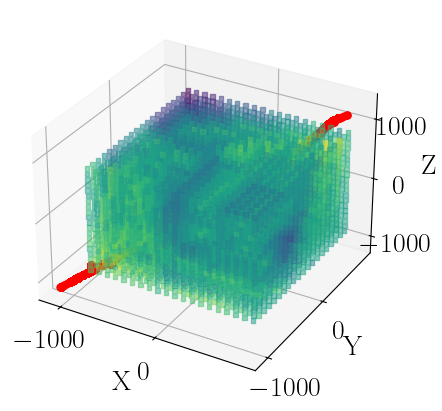

In [10]:
# %matplotlib qt
# %matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
voxelGrid = ax.scatter(grid_pos[:,0],
                       grid_pos[:,1],
                       grid_pos[:,2],  
                       c=grid[grid >= 0],
                       cmap='viridis',
                       marker='s',
                       alpha=0.5,
                       s=10,
                       norm=LogNorm())  # Use LogNorm for log scale
track = ax.plot(np.array(df_primary['position'].to_list()).reshape(-1,3)[:,0],
                np.array(df_primary['position'].to_list()).reshape(-1,3)[:,1],
                np.array(df_primary['position'].to_list()).reshape(-1,3)[:,2],
                c='r',
                marker='o',
                markersize=5,
                linewidth=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm())
sm.set_array(grid[grid > 0])
# cbar = fig.colorbar(sm, ax=ax, label='Color Bar (Log Scale)')
fig.show()

# Mean Slice Reconstruction

In [11]:
pos_avg = np.zeros((grid.shape[0], 2))
for x in np.arange(grid.shape[0]):
    val = grid[x,:,:].flatten()
    if np.sum(val) == 0:
        continue
    pos = grid_pos[np.where(grid_ind[:,0] == x)][:,:2]
    pos_avg[x,0] = np.average(pos[:,0], weights=val)
    pos_avg[x,1] = np.average(pos[:,1], weights=val)
X = np.array([np.unique(grid_pos[:,0]), pos_avg[:,0], pos_avg[:,1]]).T

pos_avg = np.zeros((grid.shape[1], 2))
for y in np.arange(grid.shape[1]):
    val = grid[:,y,:].flatten()
    if np.sum(val) == 0:
        continue
    pos = grid_pos[np.where(grid_ind[:,1] == y)][:,:2]
    pos_avg[y,0] = np.average(pos[:,0], weights=val)
    pos_avg[y,1] = np.average(pos[:,1], weights=val)
Y = np.array([pos_avg[:,0], np.unique(grid_pos[:,1]), pos_avg[:,1]]).T

pos_avg = np.zeros((grid.shape[2],2))
for z in np.arange(grid.shape[2]):
    val = grid[:,:,z].flatten()
    if np.sum(val) == 0:
        continue
    pos = grid_pos[np.where(grid_ind[:,2] == z)][:,:2]
    pos_avg[z,0] = np.average(pos[:,0], weights=val)
    pos_avg[z,1] = np.average(pos[:,1], weights=val)
Z = np.array([pos_avg[:,0], pos_avg[:,1], np.unique(grid_pos[:,2])]).T

pts = np.mean(np.array([X,Y,Z]), axis=0)

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_61234/1643855225.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


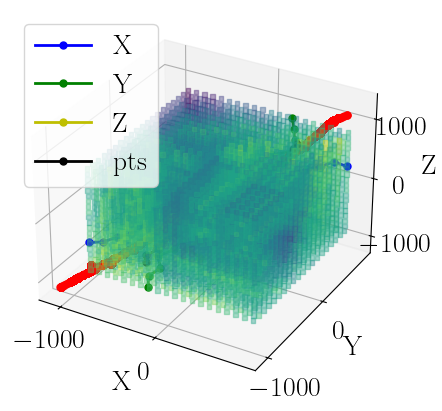

In [12]:
# %matplotlib qt
# %matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
voxelGrid = ax.scatter(grid_pos[:,0],
                       grid_pos[:,1],
                       grid_pos[:,2],  
                       c=grid[grid >= 0],
                       cmap='viridis',
                       marker='s',
                       alpha=0.4,
                       s=10,
                       norm=LogNorm())  # Use LogNorm for log scale
track_true = ax.plot(np.array(df_primary['position'].to_list()).reshape(-1,3)[:,0],
                     np.array(df_primary['position'].to_list()).reshape(-1,3)[:,1],
                     np.array(df_primary['position'].to_list()).reshape(-1,3)[:,2],
                     c='r',
                     marker='o',
                     markersize=5,
                     linewidth=2)
track_reco_X = ax.plot(X[:,0],
                       X[:,1],
                       X[:,2],
                       c='b',
                       marker='o',
                       markersize=5,
                       label='X',
                       linewidth=2)
track_reco_Y = ax.plot(Y[:,0],
                       Y[:,1],
                       Y[:,2],
                       c='g',
                       marker='o',
                       markersize=5,
                       label='Y',
                       linewidth=2)
track_reco_Z = ax.plot(Z[:,0],
                       Z[:,1],
                       Z[:,2],
                       c='y',
                       marker='o',
                       markersize=5,
                       label='Z',
                       linewidth=2)
track_reco = ax.plot(pts[:,0],
                     pts[:,1],
                     pts[:,2],
                     c='k',
                     marker='o',
                     markersize=5,
                     label='pts',
                     linewidth=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm())
sm.set_array(grid[grid > 0])
ax.legend()
# cbar = fig.colorbar(sm, ax=ax, label='Color Bar (Log Scale)')
fig.show()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_61234/1292251818.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


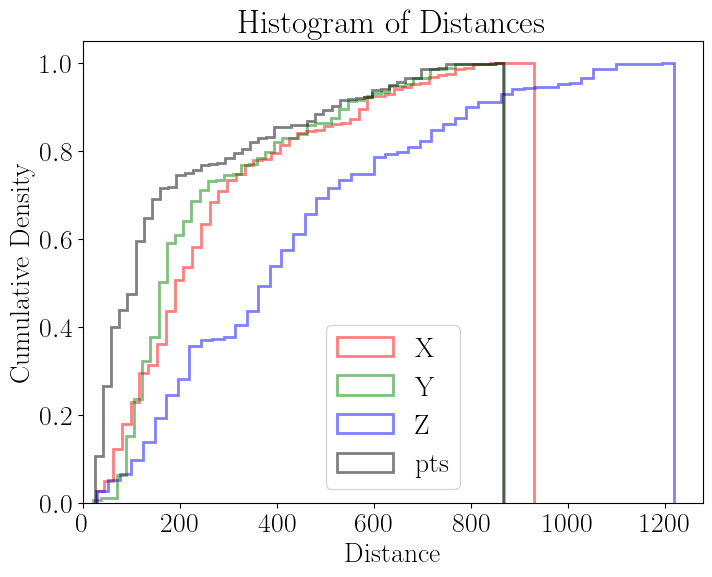

In [13]:
# %matplotlib inline

X_true = np.array(df_primary['position'].to_list()).reshape(-1,3)
X_true = X_true[np.where((X_true[:, 0] <  DETECTOR_SIZE_X_MM) & (X_true[:, 1] <  DETECTOR_SIZE_Y_MM) & (X_true[:, 2] <  DETECTOR_SIZE_Z_MM)
                       & (X_true[:, 0] > -DETECTOR_SIZE_X_MM) & (X_true[:, 1] > -DETECTOR_SIZE_Y_MM) & (X_true[:, 2] > -DETECTOR_SIZE_Z_MM))]
distances_X = cdist(np.array(df_primary['position'].to_list()).reshape(-1,3), X)
distances_X = np.min(distances_X, axis=1)

Y_true = np.array(df_primary['position'].to_list()).reshape(-1,3)
Y_true = Y_true[np.where((Y_true[:, 0] <  DETECTOR_SIZE_X_MM) & (Y_true[:, 1] <  DETECTOR_SIZE_Y_MM) & (Y_true[:, 2] <  DETECTOR_SIZE_Z_MM)
                       & (Y_true[:, 0] > -DETECTOR_SIZE_X_MM) & (Y_true[:, 1] > -DETECTOR_SIZE_Y_MM) & (Y_true[:, 2] > -DETECTOR_SIZE_Z_MM))]
distances_Y = cdist(np.array(df_primary['position'].to_list()).reshape(-1,3), Y)
distances_Y = np.min(distances_Y, axis=1)

Z_true = np.array(df_primary['position'].to_list()).reshape(-1,3)
Z_true = Z_true[np.where((Z_true[:, 0] <  DETECTOR_SIZE_X_MM) & (Z_true[:, 1] <  DETECTOR_SIZE_Y_MM) & (Z_true[:, 2] <  DETECTOR_SIZE_Z_MM)
                       & (Z_true[:, 0] > -DETECTOR_SIZE_X_MM) & (Z_true[:, 1] > -DETECTOR_SIZE_Y_MM) & (Z_true[:, 2] > -DETECTOR_SIZE_Z_MM))]
distances_Z = cdist(np.array(df_primary['position'].to_list()).reshape(-1,3), Z)
distances_Z = np.min(distances_Z, axis=1)

pts_true = np.array(df_primary['position'].to_list()).reshape(-1,3)
pts_true = pts_true[np.where((pts_true[:, 0] <  DETECTOR_SIZE_X_MM) & (pts_true[:, 1] <  DETECTOR_SIZE_Y_MM) & (pts_true[:, 2] <  DETECTOR_SIZE_Z_MM)
                       & (pts_true[:, 0] > -DETECTOR_SIZE_X_MM) & (pts_true[:, 1] > -DETECTOR_SIZE_Y_MM) & (pts_true[:, 2] > -DETECTOR_SIZE_Z_MM))]
distances_pts = cdist(np.array(df_primary['position'].to_list()).reshape(-1,3), pts)
distances_pts = np.min(distances_pts, axis=1)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(distances_X  , bins=50, color='r', alpha=0.5, label='X'  , histtype='step', cumulative=True, density=True, linewidth=2)
ax.hist(distances_Y  , bins=50, color='g', alpha=0.5, label='Y'  , histtype='step', cumulative=True, density=True, linewidth=2)
ax.hist(distances_Z  , bins=50, color='b', alpha=0.5, label='Z'  , histtype='step', cumulative=True, density=True, linewidth=2)
ax.hist(distances_pts, bins=50, color='k', alpha=0.5, label='pts', histtype='step', cumulative=True, density=True, linewidth=2)
ax.set_xlabel('Distance')
ax.set_ylabel('Cumulative Density')
ax.set_title('Histogram of Distances')
ax.set_xlim(xmin=0)
ax.legend()
fig.show()

# Max Slice Reconstruction

In [14]:
pos_max = np.zeros((grid.shape[0], 2))
for x in np.arange(grid.shape[0]):
    val = grid[x,:,:].flatten()
    if np.sum(val) == 0:
        continue
    pos = grid_pos[np.where(grid_ind[:,0] == x)][:,:2]
    pos_max[x,0] = pos[np.argmax(val),0]
    pos_max[x,1] = np.average(pos[:,1], weights=val)
X = np.array([np.unique(grid_pos[:,0]), pos_avg[:,0], pos_avg[:,1]]).T

pos_avg = np.zeros((grid.shape[1], 2))
for y in np.arange(grid.shape[1]):
    val = grid[:,y,:].flatten()
    if np.sum(val) == 0:
        continue
    pos = grid_pos[np.where(grid_ind[:,1] == y)][:,:2]
    pos_avg[y,0] = np.average(pos[:,0], weights=val)
    pos_avg[y,1] = np.average(pos[:,1], weights=val)
Y = np.array([pos_avg[:,0], np.unique(grid_pos[:,1]), pos_avg[:,1]]).T

pos_avg = np.zeros((grid.shape[2],2))
for z in np.arange(grid.shape[2]):
    val = grid[:,:,z].flatten()
    if np.sum(val) == 0:
        continue
    pos = grid_pos[np.where(grid_ind[:,2] == z)][:,:2]
    pos_avg[z,0] = np.average(pos[:,0], weights=val)
    pos_avg[z,1] = np.average(pos[:,1], weights=val)
Z = np.array([pos_avg[:,0], pos_avg[:,1], np.unique(grid_pos[:,2])]).T

pts = np.mean(np.array([X,Y,Z]), axis=0)

# Analytical Fit Reconstruction

In [15]:
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from multiprocessing import Pool
from joblib import Parallel, delayed

def trackEquation(X, parameters):
    x0, y0, z0, x1, y1, z1 = parameters

    x = X[:,0]
    y = x0 + (x-x0)*(y1-y0)/(x1-x0)
    z = x0 + (x-x0)*(z1-z0)/(x1-x0)

    return np.array([x, y, z]).T

def valueFunction(v):
    return np.exp(-v)
    # return 10/v

def lossFunction(parameters, X=grid_pos, y=grid):
    cp, d = closestPoint(parameters, X, y)
    # print('total loss={:.2f}  closestPoint={:.2f}  distance={:.2f} || parameters={}'.format(np.mean(c1 * valueFunction(cp) + c2 * d), np.mean(cp), np.mean(d), parameters)
    return np.mean(c1 * cp + c2 * d)

def closestPoint(parameters, X=grid_pos, y=grid):
    pos = trackEquation(X, parameters)
    distances = cdist(pos, X)
    closestPoint_n = np.argmin(distances, axis=1)
    closestPoint = np.reshape(y,-1)[closestPoint_n]
    distance = distances[np.arange(len(distances)), closestPoint_n]
    return closestPoint, distance

def parallelProcess(parameters):
    print('parameters =', parameters)
    return minimize(lossFunction, parameters, method='Powell').x

cp = 0
c1 = 100
c2 = 0.2
nWorkers = 10
cp_max = 0
parameters_max = []
while cp_max < 0.5:
    parameters = Parallel(n_jobs=nWorkers)(delayed(parallelProcess)(np.random.uniform(-100, 100, 6)) for i in range(nWorkers))
    for p in parameters:
        cp, d = closestPoint(p)
        print('total loss={:.2f}  closestPoint={:.2f}  distance={:.2f} || parameters={}'.format(np.mean(c1 * valueFunction(cp) + c2 * d), np.mean(cp), np.mean(d), p))
        cp = np.mean(cp)
        if cp_max < cp:
            cp_max = cp
            parameters_max = p

KeyboardInterrupt: 

parameters = [-18.15043003  13.59224649 -58.60498682  55.93805612  26.3932517
  68.37386706]


In [ ]:
from scipy.optimize import minimize
import numpy as np

# Define the objective function
def objective_function(x):
    return x[0]**2 + x[1]**2  # Example: minimize x^2 + y^2

# Wrapper function for parallel optimization
def parallel_optimization(seed):
    result = minimize(objective_function, seed, method='Nelder-Mead')
    return result.x

# Number of parallel workers
num_workers = 4

# Set random seeds for reproducibility
np.random.seed(42)
initial_guesses = [np.random.rand(6) for _ in range(num_workers)]

# Use joblib to parallelize optimization
optimized_parameters = Parallel(n_jobs=num_workers)(delayed(parallel_optimization)(seed) for seed in initial_guesses)

# Print the optimized parameters
print(optimized_parameters)

[array([-8.47659987e-06,  3.44607534e-06,  3.81079664e-01,  8.78750122e-01,
        1.85075938e-01,  2.68803111e-01]), array([1.42659069e-06, 3.64170466e-06, 8.97996235e-01, 1.46120361e+00,
       1.05403156e-02, 1.37217966e+00]), array([-7.00795315e-06, -1.40828529e-05,  5.39976354e-02,  1.05552862e-01,
        8.15394577e-01,  1.05333690e+00]), array([-8.51993215e-06, -2.10692067e-05,  2.95263211e-01,  2.47776100e-01,
        4.21115202e-01,  4.52236999e-01])]


In [ ]:
parameters = [0.93348707, 0.70200428, 0.37834567, 0.36939029, 0.13789963, 0.19075573]
X = np.linspace(np.array(DETECTOR_SIZE_MM)/-2, np.array(DETECTOR_SIZE_MM)/2, 100)
X = trackEquation(X, parameters)

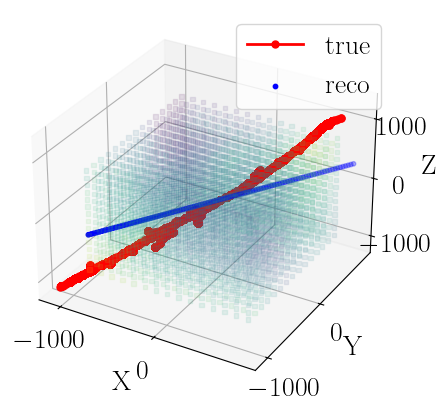

In [ ]:
# %matplotlib inline
# %matplotlib qt

# Plot the original points and the fitted line
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
voxelGrid = ax.scatter(
    grid_pos[:,0],
    grid_pos[:,1],
    grid_pos[:,2],  
    c=grid[grid >= 0],
    cmap='viridis',
    marker='s',
    s=10,
    alpha=0.1,
    norm=LogNorm()
)
track_true = ax.plot(
    np.array(df_primary['position'].to_list()).reshape(-1,3)[:,0],
    np.array(df_primary['position'].to_list()).reshape(-1,3)[:,1],
    np.array(df_primary['position'].to_list()).reshape(-1,3)[:,2],
    c='r',
    marker='o',
    markersize=5,
    linewidth=2,
    label='true'
)
track_reco = ax.scatter(
    X[:,0],
    X[:,1],
    X[:,2],
    c='b',
    marker='o',
    s=10,
    label='reco'
)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

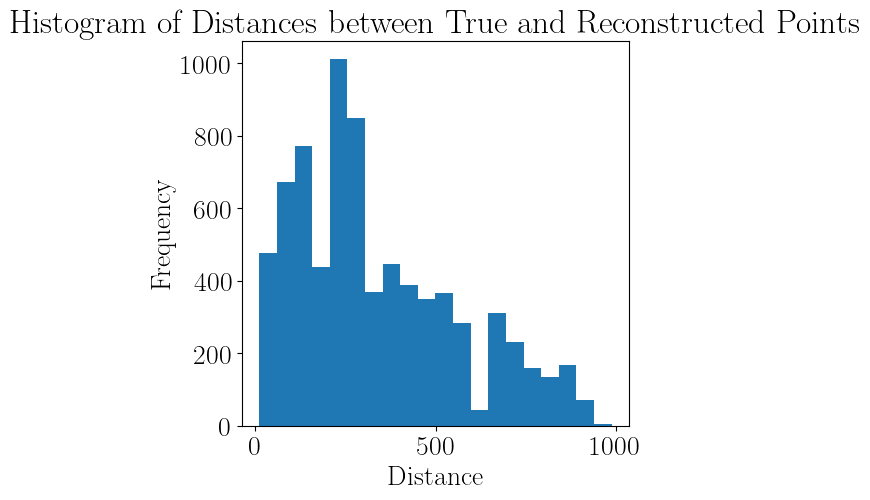

In [ ]:
# %matplotlib inline

distances = cdist(np.array(df_primary['position'].to_list()).reshape(-1,3), X)
distances = np.min(distances, axis=1)

# Plot a histogram of the distances
fig_error = plt.figure()
plt.hist(distances, bins=20)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between True and Reconstructed Points')
plt.show()
